## 1)Load the packages

In [8]:
import numpy as np
import pandas as pd
import itertools
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (MultiprocessingEvaluator, 
                           Scenario, Constraint, Policy,
                           ScalarOutcome)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.evaluators import (perform_experiments, optimize,
                                                   BaseEvaluator)
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.analysis import (pairs_plotting, prim, 
                                    feature_scoring, parcoords,
                                    dimensional_stacking)

#from problem_formulation import get_model_for_problem_formulation
%matplotlib inline

ema_logging.log_to_stderr(ema_logging.INFO)

BaseEvaluator.reporting_frequency = 0.01

## 2) Load results

In [9]:
results = load_results('MORO4pol_lessdikeheightnorfr.tar.gz')
experiment,_ = results
results_df = pd.DataFrame.from_dict(_) 

[MainProcess/INFO] results loaded succesfully from C:\Users\user\EPA1361\fin_ass\run_prim\MORO4pol_lessdikeheightnorfr.tar.gz


In [10]:
n_scenarios = 2000
robustness_dict = {}
results_df['name'] = experiment['policy']
results_df.head()

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Expected Number of Deaths 1,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,A.5_Expected Annual Damage 1,A.5_Dike Investment Costs 1,A.5_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,name
0,0.0,6.071731e+07,0.0,0.0,8.999201e+07,0.0,0.0,4.421502e+07,0.0,1.341898e+06,...,0.0,0.000000e+00,8.109687e+06,0.000000,5.459393e+06,0,0.003078,151900000.0,0.0,policy1
1,0.0,6.071731e+07,0.0,0.0,8.999201e+07,0.0,0.0,4.421502e+07,0.0,1.592977e+06,...,0.0,0.000000e+00,8.109687e+06,0.000000,0.000000e+00,0,0.000000,151900000.0,0.0,policy1
2,0.0,6.071731e+07,0.0,0.0,8.999201e+07,0.0,0.0,4.421502e+07,0.0,0.000000e+00,...,0.0,0.000000e+00,8.109687e+06,0.000000,0.000000e+00,0,0.000000,151900000.0,0.0,policy1
3,0.0,6.071731e+07,0.0,0.0,8.999201e+07,0.0,0.0,4.421502e+07,0.0,0.000000e+00,...,0.0,0.000000e+00,8.109687e+06,0.000000,0.000000e+00,0,0.000000,151900000.0,0.0,policy1
4,0.0,6.071731e+07,0.0,0.0,8.999201e+07,0.0,0.0,4.421502e+07,0.0,1.347972e+07,...,0.0,2.453579e+06,8.109687e+06,0.001432,0.000000e+00,0,0.000000,151900000.0,0.0,policy1


In [11]:
results_df['A.1_Expected Annual Damage'] = results_df['A.1_Expected Annual Damage 0'] + results_df['A.1_Expected Annual Damage 1']
results_df['A.2_Expected Annual Damage'] = results_df['A.2_Expected Annual Damage 0'] + results_df['A.2_Expected Annual Damage 1']
results_df['A.3_Expected Annual Damage'] = results_df['A.3_Expected Annual Damage 0'] + results_df['A.3_Expected Annual Damage 1']
results_df['A.4_Expected Annual Damage'] = results_df['A.4_Expected Annual Damage 0'] + results_df['A.4_Expected Annual Damage 1']
results_df['A.5_Expected Annual Damage'] = results_df['A.5_Expected Annual Damage 0'] + results_df['A.5_Expected Annual Damage 1']
results_df['A.1_Expected Number of Deaths'] = results_df['A.1_Expected Number of Deaths 0'] + results_df['A.1_Expected Number of Deaths 1']
results_df['A.2_Expected Number of Deaths'] = results_df['A.1_Expected Number of Deaths 0'] + results_df['A.1_Expected Number of Deaths 1']
results_df['A.3_Expected Number of Deaths'] = results_df['A.1_Expected Number of Deaths 0'] + results_df['A.1_Expected Number of Deaths 1']
results_df['A.4_Expected Number of Deaths'] = results_df['A.1_Expected Number of Deaths 0'] + results_df['A.1_Expected Number of Deaths 1']
results_df['A.5_Expected Number of Deaths'] = results_df['A.1_Expected Number of Deaths 0'] + results_df['A.1_Expected Number of Deaths 1']

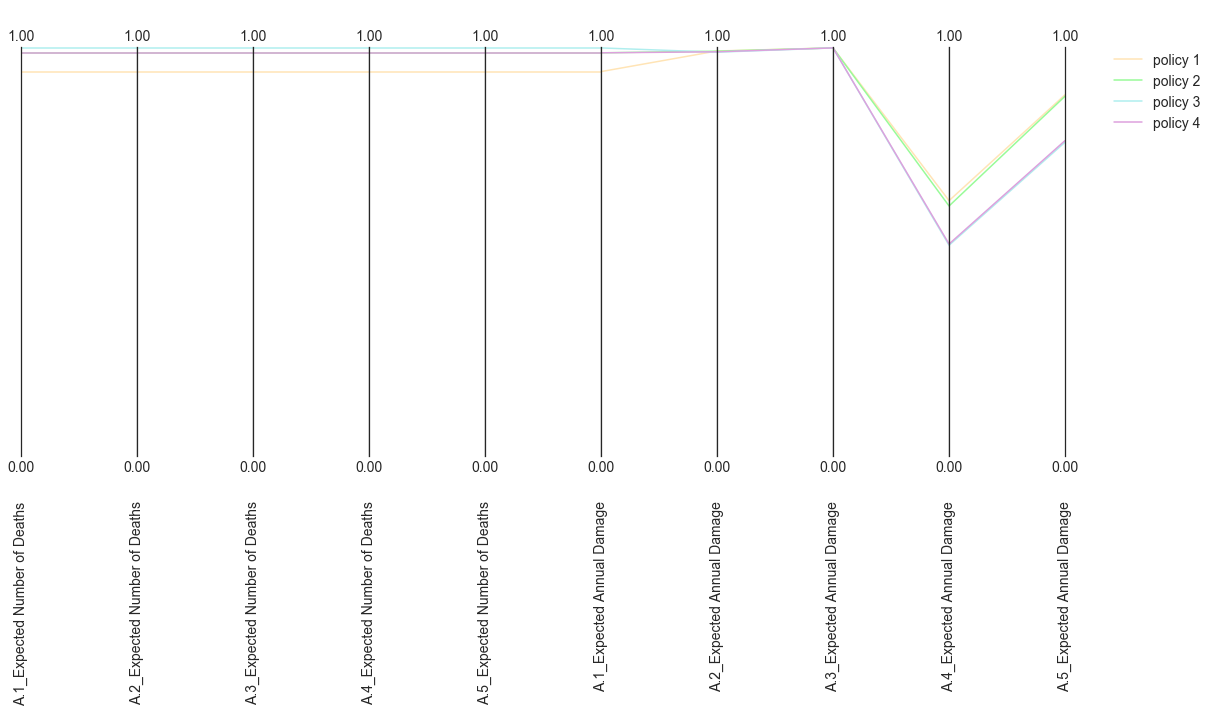

In [31]:
n_scenarios = 2000
robustness_dict = {}
results_df['name'] = experiment['policy']
objectives = ['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths',
             'A.3_Expected Number of Deaths','A.4_Expected Number of Deaths',
             'A.5_Expected Number of Deaths','A.1_Expected Annual Damage',
             'A.2_Expected Annual Damage','A.3_Expected Annual Damage',
             'A.4_Expected Annual Damage','A.5_Expected Annual Damage']

for obj in objectives:
    robustness = []
    for i in range(0, len(results_df['name'].unique())):
        df_pol = results_df[results_df['name']==results_df['name'].unique()[i]]
        if ('Deaths' in obj):
            robustness_policy_outcome = len(df_pol[df_pol[obj]< 0.000002])/len(df_pol)
            robustness.append(robustness_policy_outcome)
        else:
            robustness_policy_outcome = len(df_pol[df_pol[obj]<20000])/len(df_pol)
            robustness.append(robustness_policy_outcome)
    robustness_dict[obj] = robustness 
robust_df = pd.DataFrame(data=robustness_dict)
limits = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1]], columns=objectives)
axes = parcoords.ParallelAxes(limits)
colors = ['moccasin','palegreen','paleturquoise','plum','khaki','lightsalmon','silver','darkseagreen']
for i in range(0,len(robust_df)):
    outcomes = robust_df.iloc[i]
    axes.plot(outcomes.to_frame().T,label='policy {}'.format(i+1),color = colors[i])
axes.fig.set_size_inches(15,10)
axes.legend()
plt.show()


## 2) Box Plot

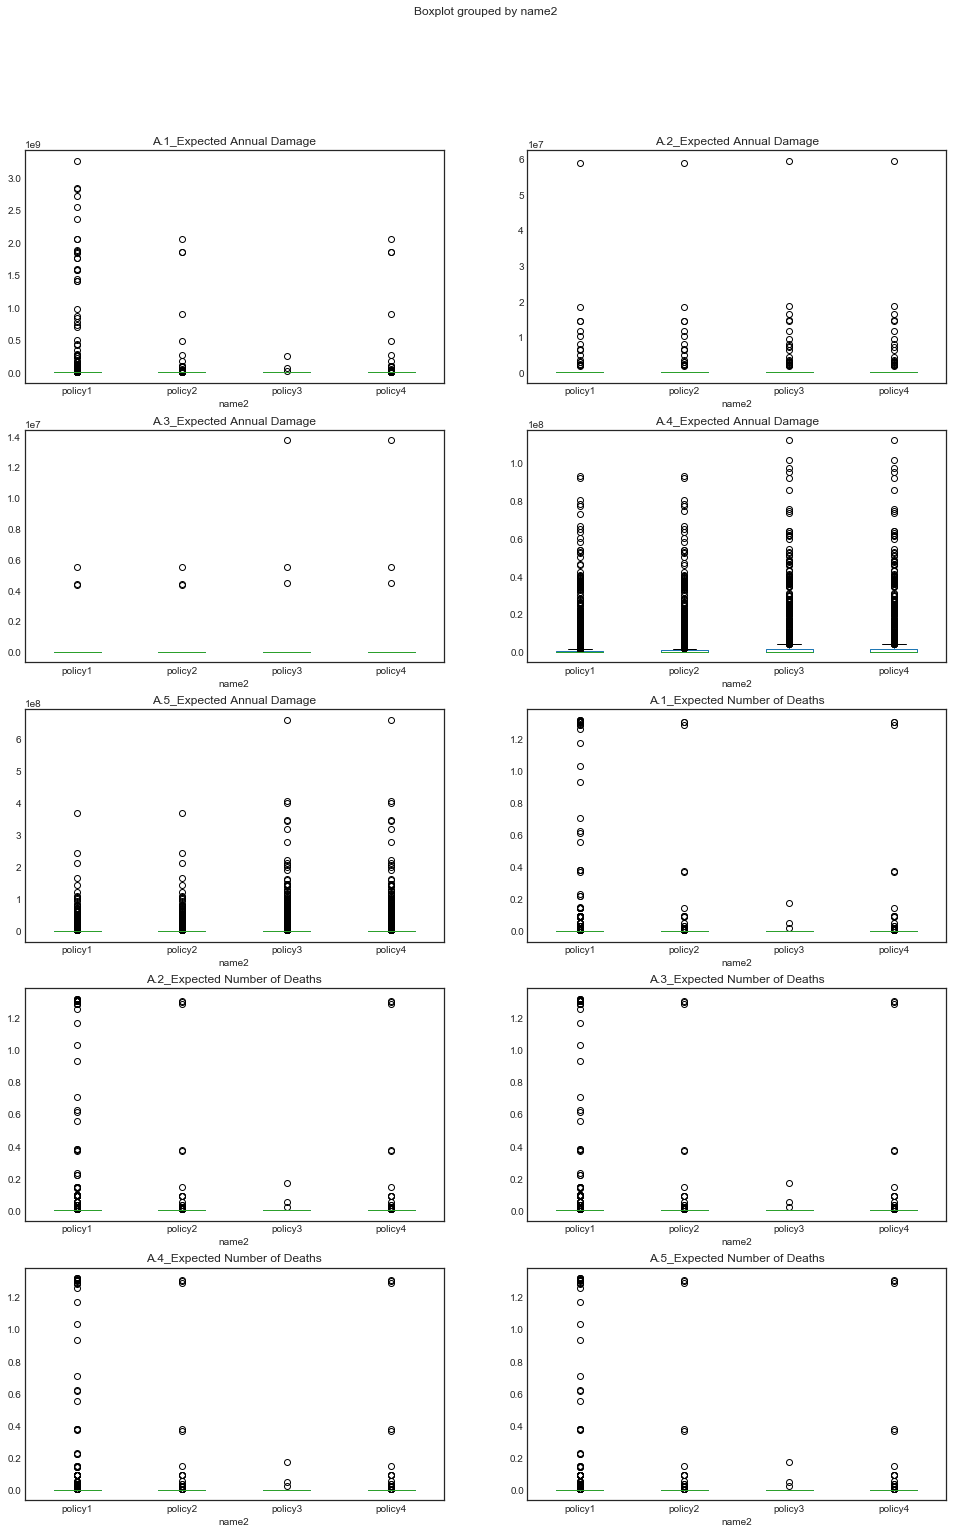

In [13]:
results_df['name2'] = results_df['name']
results_df2 = results_df.iloc[:,35:50]
col = 2
row = 5
fig,ax = plt.subplots(row,col,figsize=(8*col,5*row))
location = list(itertools.product(range(row),range(col)))
fig.suptitle('Boxplots for each objective')
for i in range (0,len(results_df2.columns)-1):
    locat = location[i]
    results_df2.boxplot(column=[results_df2.columns[i]],by='name2',ax = ax[locat],grid=False)

## 3)Pairplot for cost at each location

In [8]:
costs = results_df[['A.1 Total Costs','A.2 Total Costs','A.3 Total Costs','A.4 Total Costs','A.5 Total Costs','name']]
sns.pairplot(costs,hue='name')

## 4) Pairplot for Deaths at each location

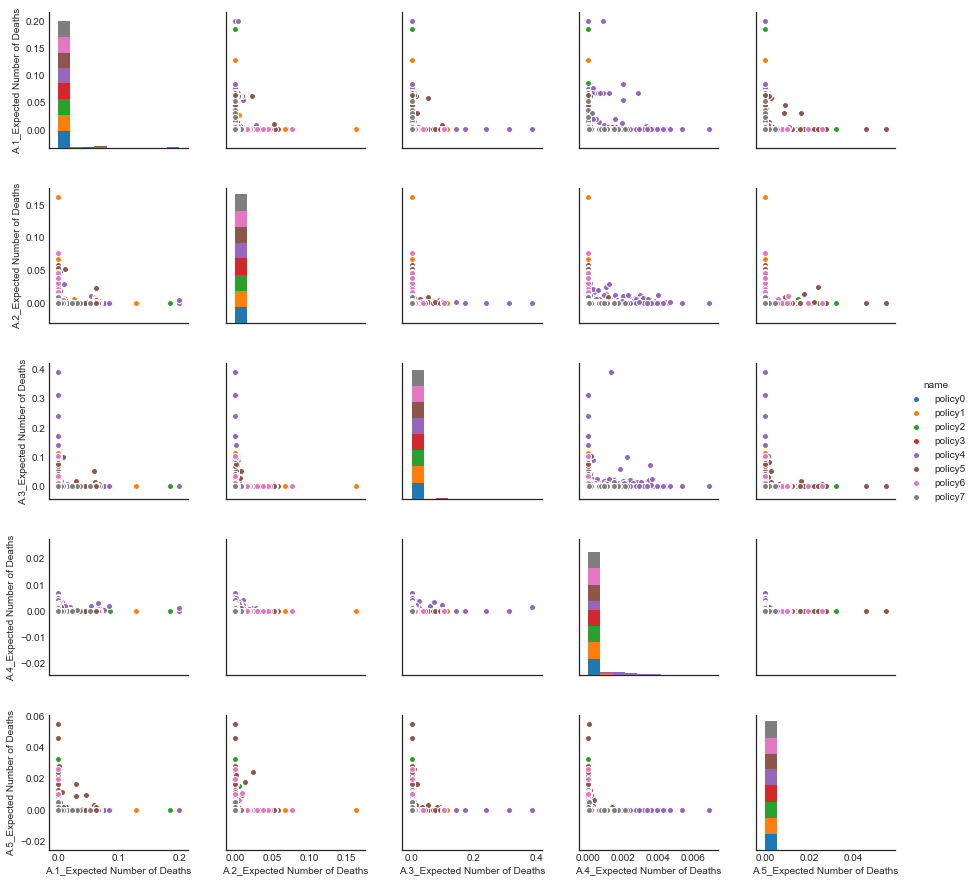

In [35]:
costs = results_df[['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths','name']]
sns.pairplot(costs,hue='name')

## 5)Subspace partitioning

In [10]:
results_df2.columns

Index(['A.1_Expected Annual Damage', 'A.2_Expected Annual Damage',
       'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage',
       'A.5_Expected Annual Damage', 'A.1_Expected Number of Deaths',
       'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
       'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths',
       'name2'],
      dtype='object')

In [14]:
#Define the function for success of policy under a scenario and apply it to the results.The scripts for
#performing PRIM and dimensional stacking on all policies is below.Currently it shows error because 
#this "success" function is not defined properly
def success(df):
    for i in range (0,len(df)):
        if (df.loc[i,'A.1_Expected Number of Deaths']>0):
            a1 = 1
        else:
            a1 = 0
        if (df.loc[i,'A.2_Expected Number of Deaths']>0):
            a2 = 1
        else:
            a2 = 0
        if (df.loc[i,'A.3_Expected Number of Deaths']>0):
            a3 = 1
        else:
            a3 = 0
        if (df.loc[i,'A.4_Expected Number of Deaths']>0):
            a4 = 1
        else:
            a4 = 0
        if (df.loc[i,'A.5_Expected Number of Deaths']>0):
            a5 = 1
        else:
            a5 = 0
        if (df.loc[i,'A.1_Expected Annual Damage']>20000):
            a6 = 1
        else:
            a6 = 0
        if (df.loc[i,'A.2_Expected Annual Damage']>20000):
            a7 = 1
        else:
            a7 = 0
        if (df.loc[i,'A.3_Expected Annual Damage']>20000):
            a8 = 1
        else:
            a8 = 0
        if (df.loc[i,'A.4_Expected Annual Damage']>20000):
            a9 = 1
        else:
            a9 = 0
        if (df.loc[i,'A.5_Expected Annual Damage']>20000):
            a10 = 1
        else:
            a10 = 0

        if ((a1+a2+a3+a4+a5)>1):
            df.loc[i,'success']=1
        else:
            df.loc[i,'success']=0


In [15]:
success(results_df2)

In [25]:
results_df2['name'] = experiment['policy']

In [30]:
len(results_df2[(results_df2['success']==1)&(results_df2['name']=='policy4')])

27

In [17]:
experiment['success'] = results_df2['success']
diff_policies = {}
for i in range (0,len(experiment['policy'].unique())):
    df = experiment[experiment['policy']== experiment['policy'].unique()[i]]
    string = 'policy' + str(i)
    diff_policies[string] = df

In [13]:
#diff_policies['policy1']

In [18]:
#0:19
def prim_analysis(dict_pol):
    for key in dict_pol:
        df_prim = dict_pol[key]
        x = df_prim.ix[:,0:19]
        y = df_prim['success']
        y = y.values
        prim_alg = prim.Prim(x, y, threshold=0.02, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        box1.show_tradeoff()
        plt.show()
        box1.inspect(style='graph')
        plt.show()
        box1.show_pairs_scatter()
        fig = plt.gcf()
        fig.set_size_inches(12,12)
        plt.show()
        dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
        plt.show()

        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
[MainProcess/INFO] 2000 points remaining, containing 119 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0505, coverage: 0.8487394957983193, density: 1.0 restricted_dimensions: 1


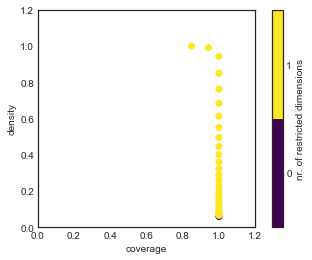

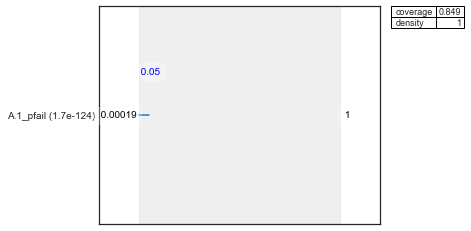

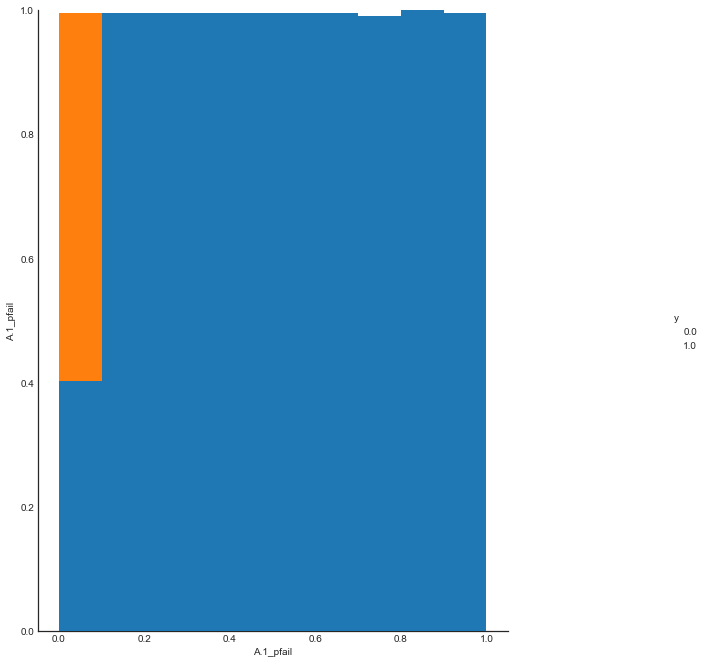

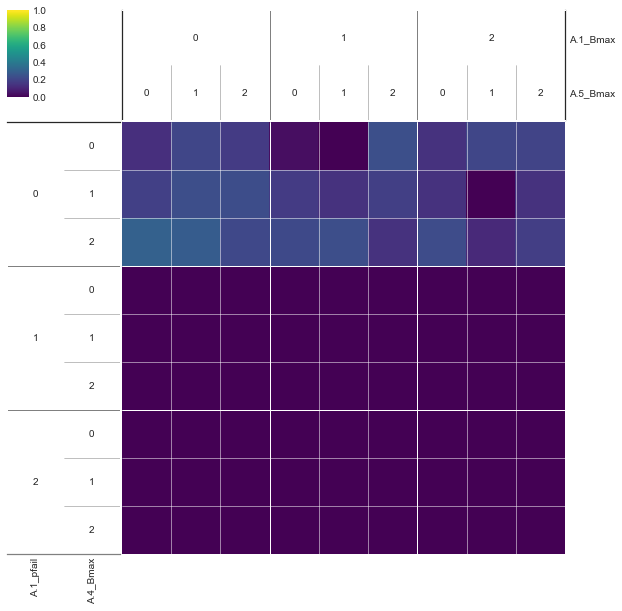

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
[MainProcess/INFO] 2000 points remaining, containing 27 cases of interest
[MainProcess/INFO] mean: 0.26732673267326734, mass: 0.0505, coverage: 1.0, density: 0.26732673267326734 restricted_dimensions: 2


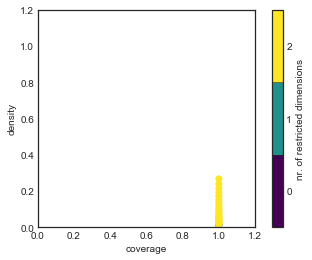

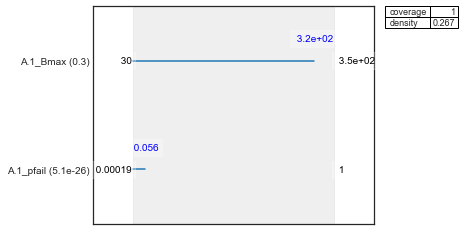

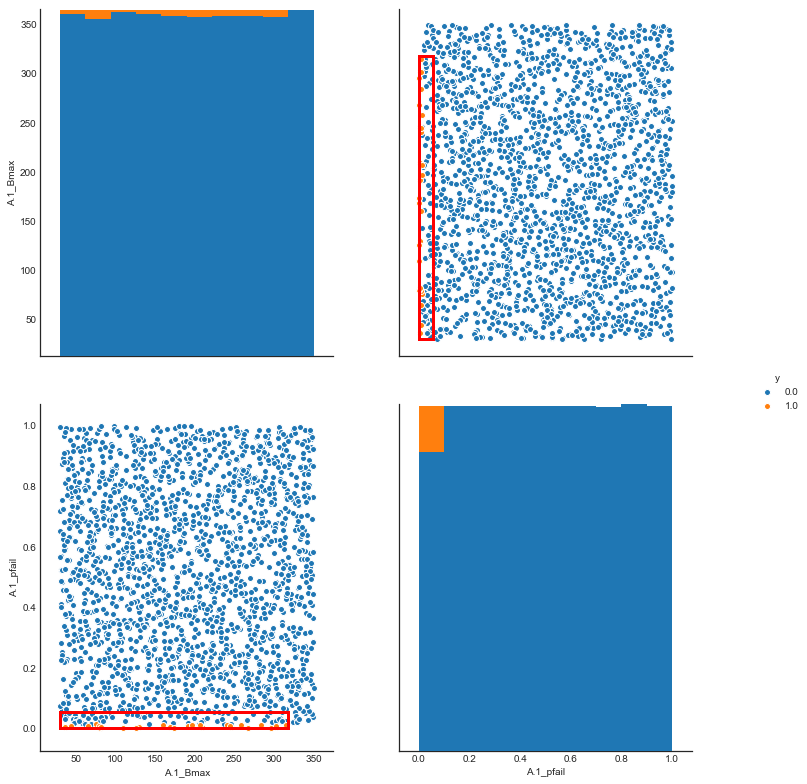

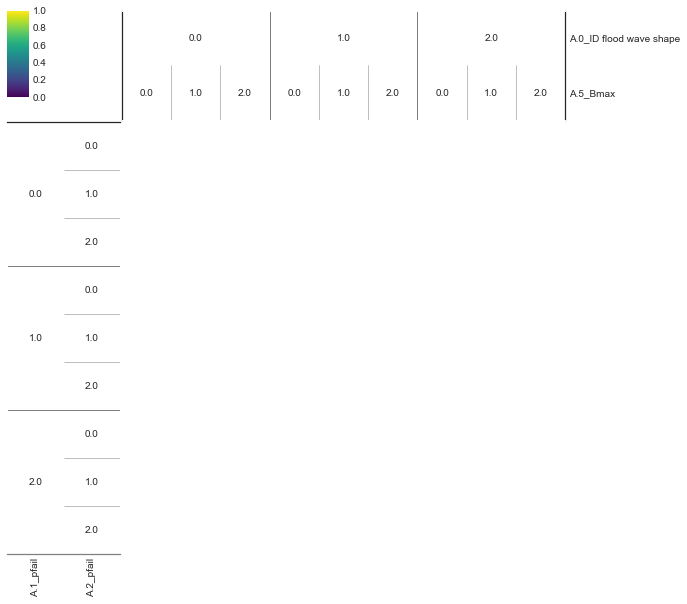

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
[MainProcess/INFO] 2000 points remaining, containing 3 cases of interest
[MainProcess/INFO] mean: 0.0297029702970297, mass: 0.0505, coverage: 1.0, density: 0.0297029702970297 restricted_dimensions: 6


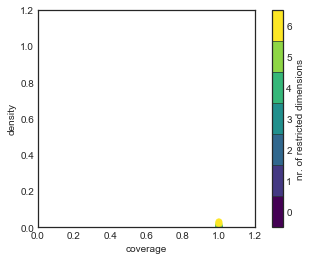

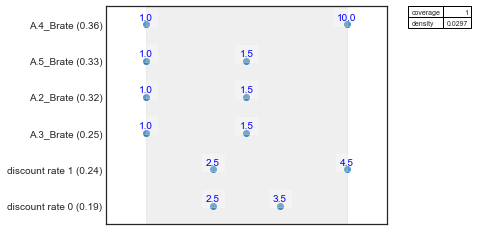

A.2_Brate [1.0, 1.5, 10.0]
A.3_Brate [1.0, 1.5, 10.0]
A.4_Brate [1.0, 10.0, 1.5]
A.5_Brate [1.0, 1.5, 10.0]
discount rate 0 [2.5, 3.5, 1.5, 4.5]
discount rate 1 [2.5, 4.5, 1.5, 3.5]


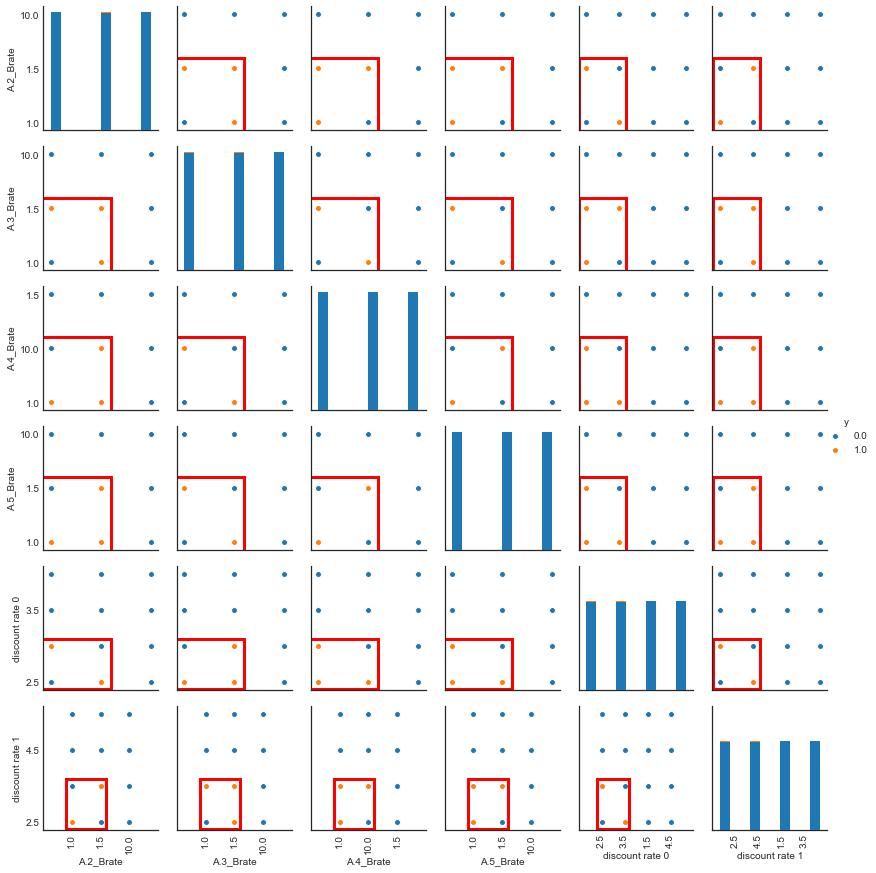

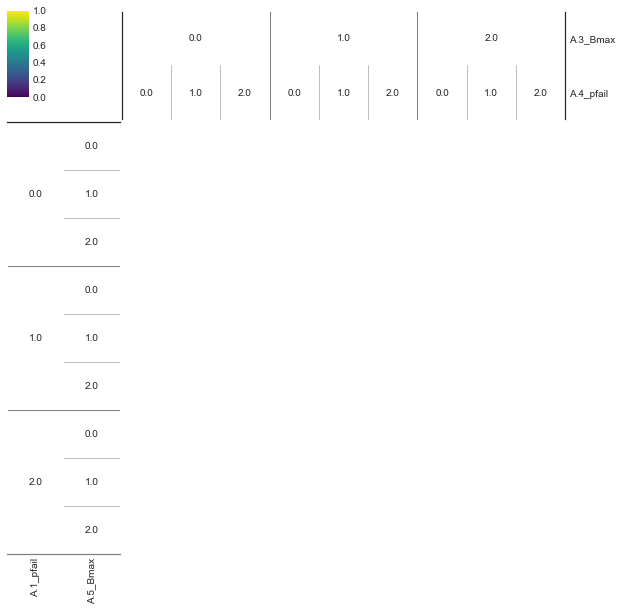

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
[MainProcess/INFO] 2000 points remaining, containing 27 cases of interest
[MainProcess/INFO] mean: 0.26732673267326734, mass: 0.0505, coverage: 1.0, density: 0.26732673267326734 restricted_dimensions: 2


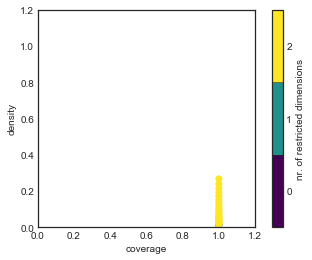

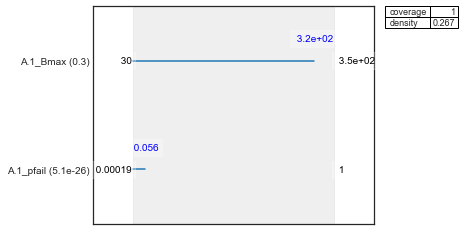

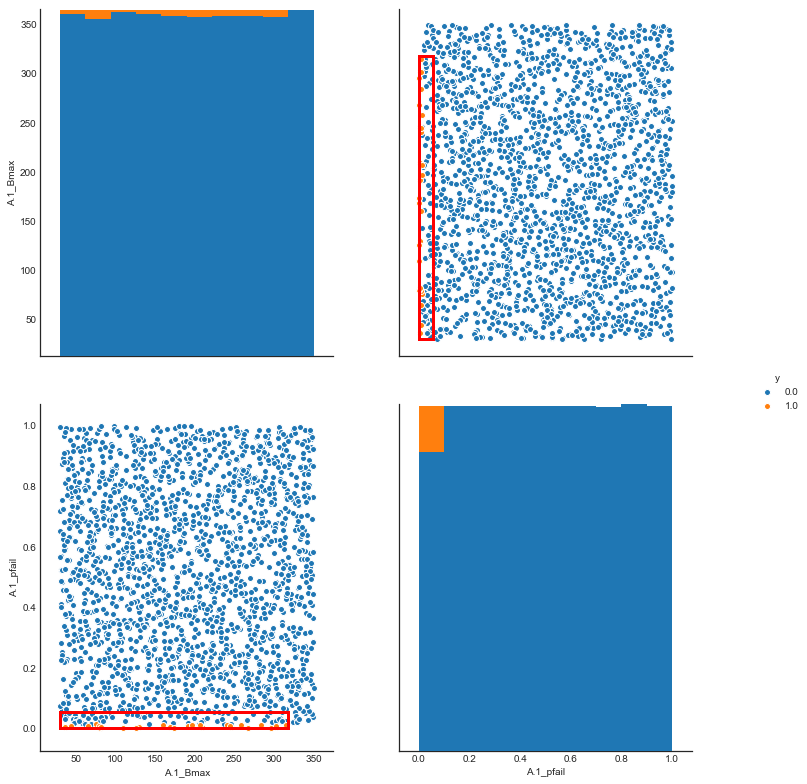

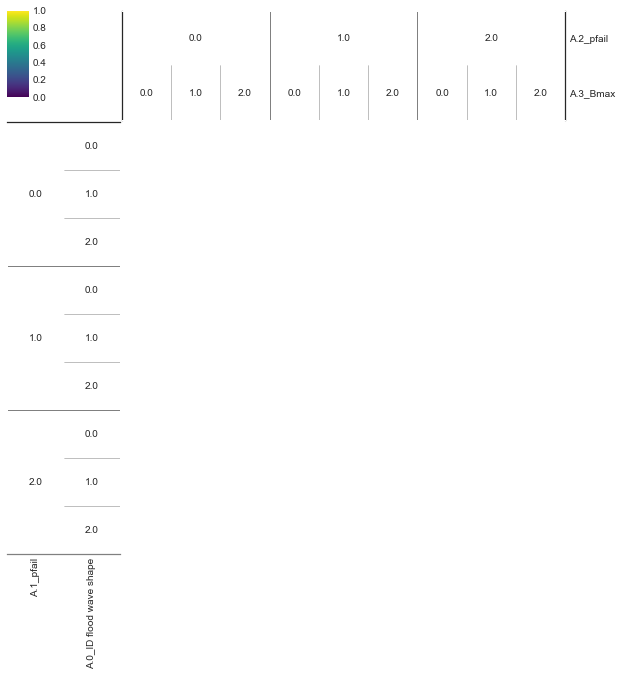

In [19]:
prim_analysis(diff_policies)